In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("6-healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df["hypertension"].unique() 

array([0, 1])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

imbalanced dataset

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df["ever_married"] =df["ever_married"].map({"Yes" :1, "No":0})

In [9]:
df["ever_married"].unique()

array([1, 0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [11]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,1,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,1,Govt_job,Urban,85.28,26.2,Unknown,0


In [12]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [13]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [14]:
categorical_cols =df.select_dtypes(include=["object"]).columns.tolist()
print(categorical_cols)

['gender', 'work_type', 'Residence_type', 'smoking_status']


In [15]:
for col in categorical_cols:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)

In [16]:
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,228.69,36.6,1,1,0,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,1,202.21,NaN,1,0,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,105.92,32.5,1,1,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,1,171.23,34.4,1,0,0,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,1,174.12,24.0,1,0,0,0,0,1,0,0,0,1,0


In [17]:
df["bmi"].fillna(df["bmi"].mean(),inplace=True)

In [18]:
df["bmi"].isnull().sum()

np.int64(0)

In [19]:
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,228.69,36.600000,1,1,0,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,1,202.21,28.893237,1,0,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,105.92,32.500000,1,1,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,1,171.23,34.400000,1,0,0,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,1,174.12,24.000000,1,0,0,0,0,1,0,0,0,1,0


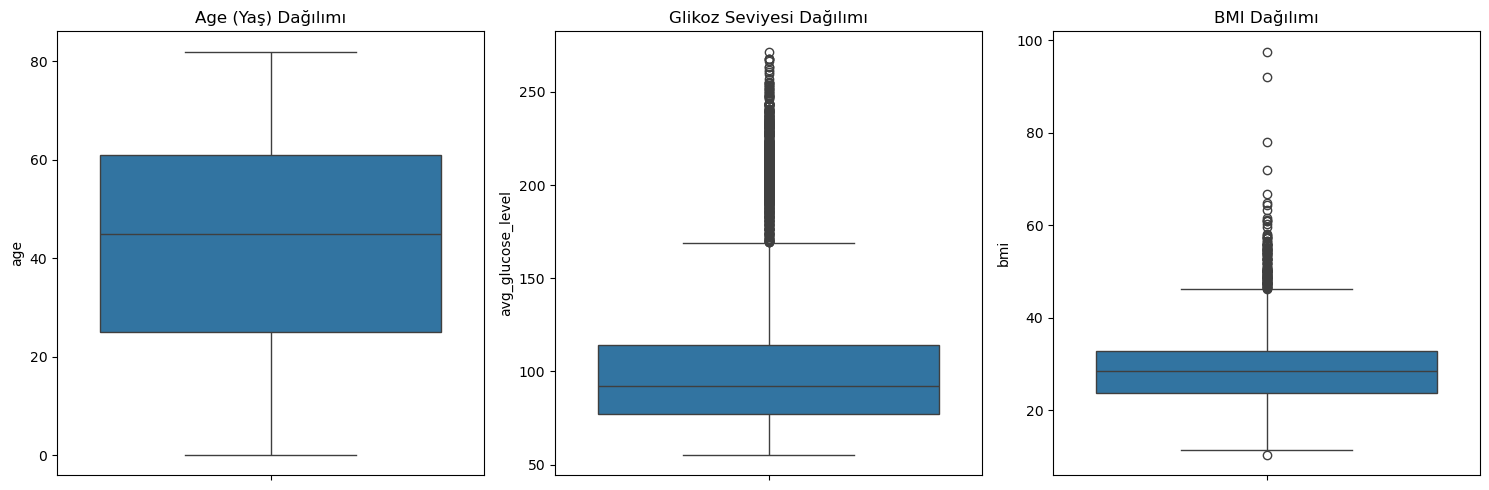

In [20]:
# Figür boyutunu ayarla
plt.figure(figsize=(15, 5))

# 1. Grafik: Age
plt.subplot(1, 3, 1)
sns.boxplot(y=df['age'])
plt.title('Age (Yaş) Dağılımı')

# 2. Grafik: Avg Glucose Level
plt.subplot(1, 3, 2)
sns.boxplot(y=df['avg_glucose_level'])
plt.title('Glikoz Seviyesi Dağılımı')

# 3. Grafik: BMI
plt.subplot(1, 3, 3)
sns.boxplot(y=df['bmi'])
plt.title('BMI Dağılımı')

plt.tight_layout()
plt.show()

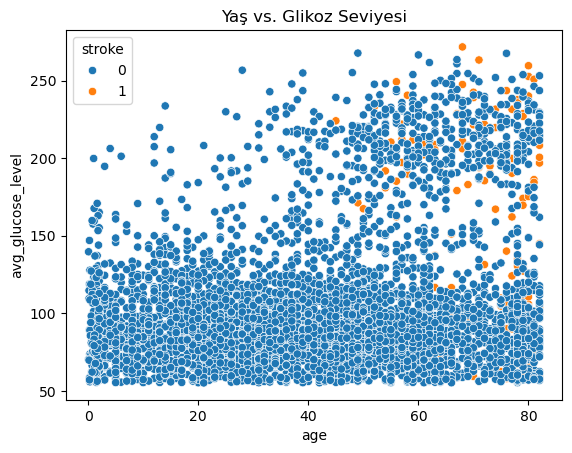

In [21]:
sns.scatterplot(x=df['age'], y=df['avg_glucose_level'], hue=df['stroke'])
plt.title('Yaş vs. Glikoz Seviyesi')
plt.show()

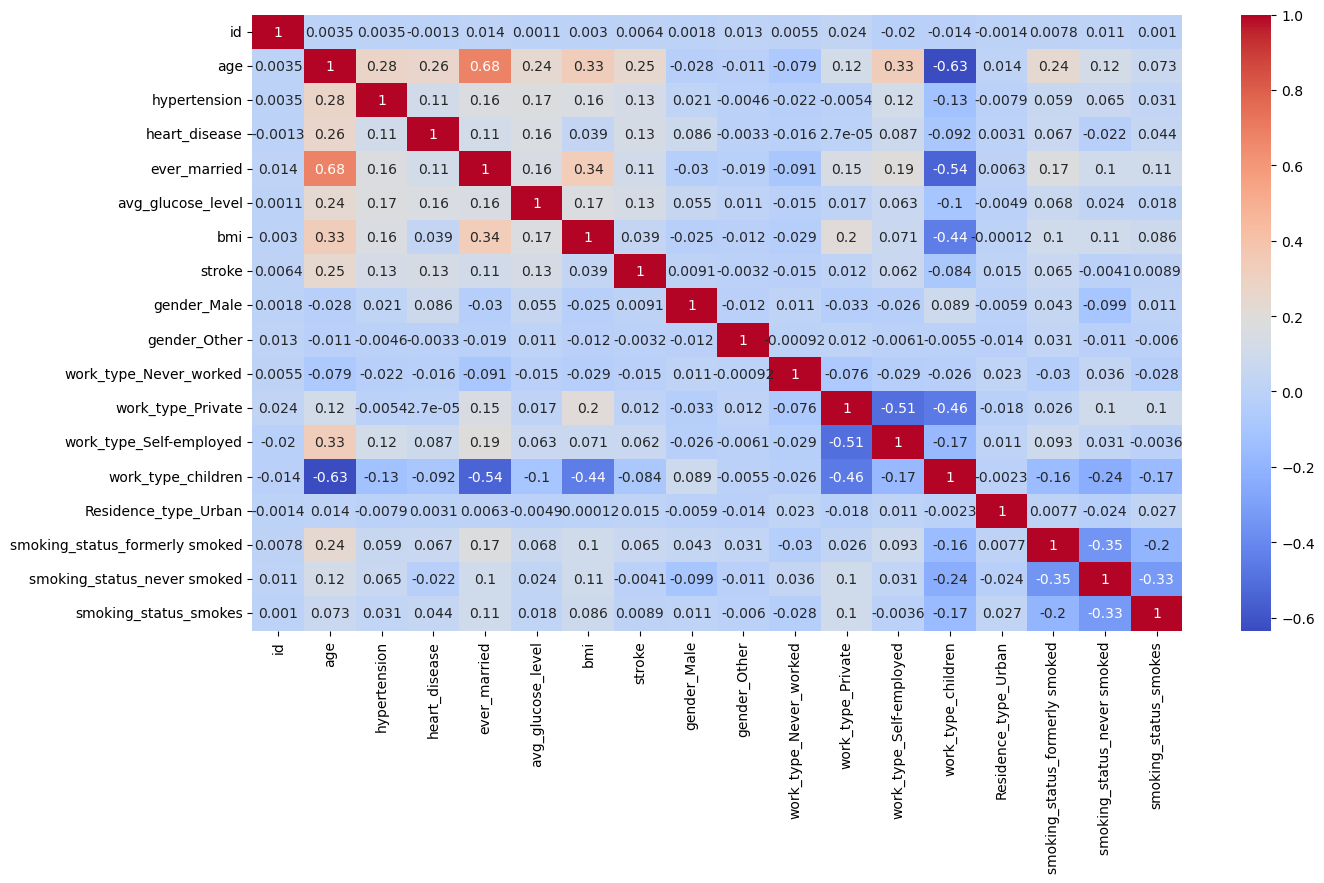

In [22]:
corr=df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

In [23]:
# Feature Engineering
df['age_x_glucose'] = df['age'] * df['avg_glucose_level']
df['age_x_bmi'] = df['age'] * df['bmi']
df['age_sq'] = df['age']**2
df['bmi_sq'] = df['bmi']**2
df['glucose_sq'] = df['avg_glucose_level']**2

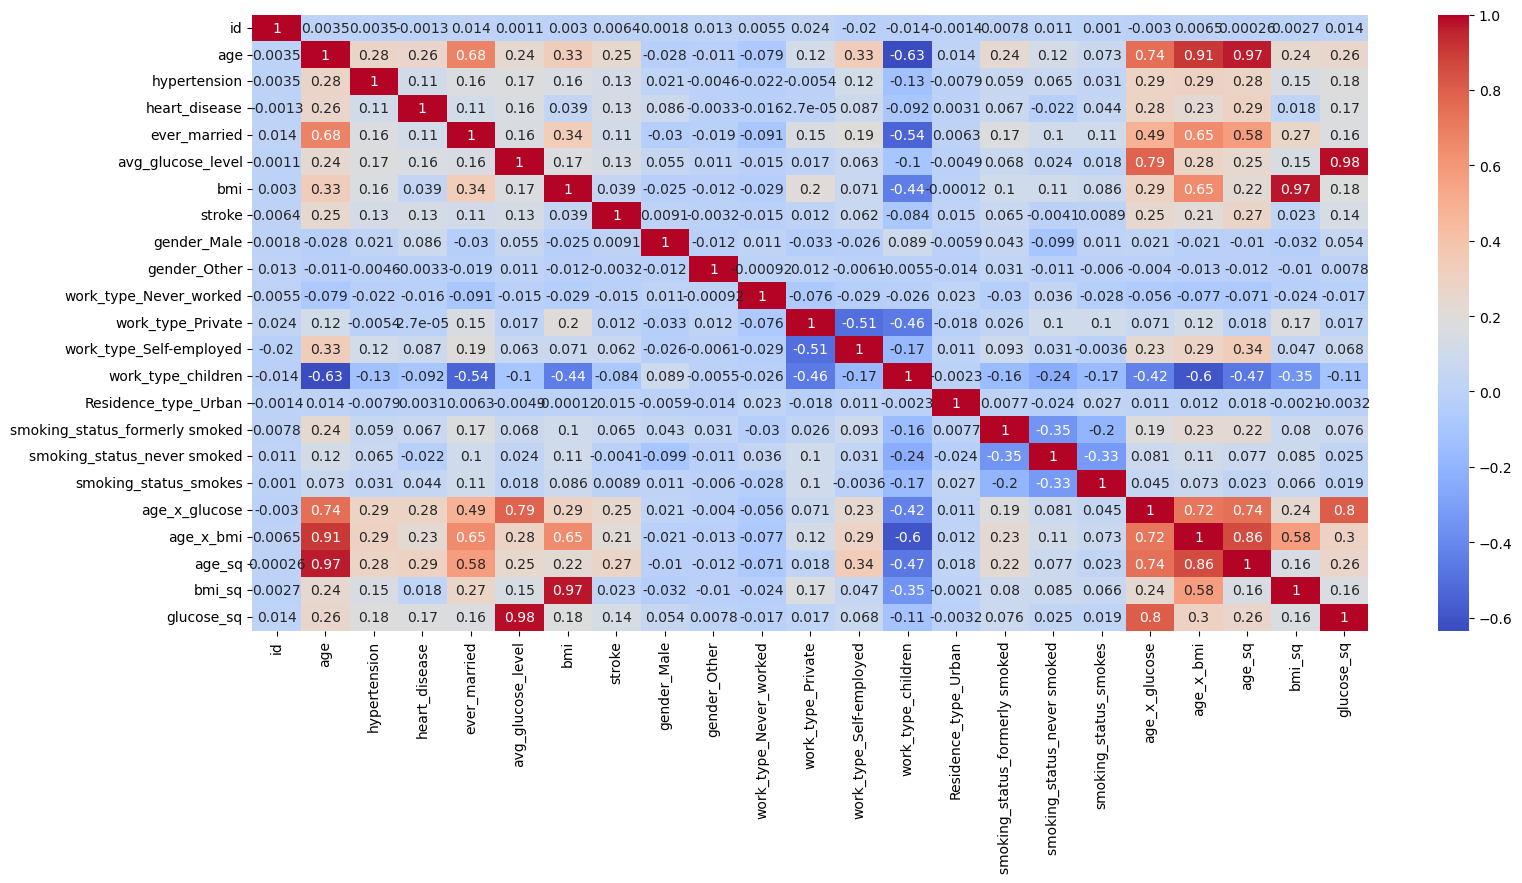

In [24]:
corr=df.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

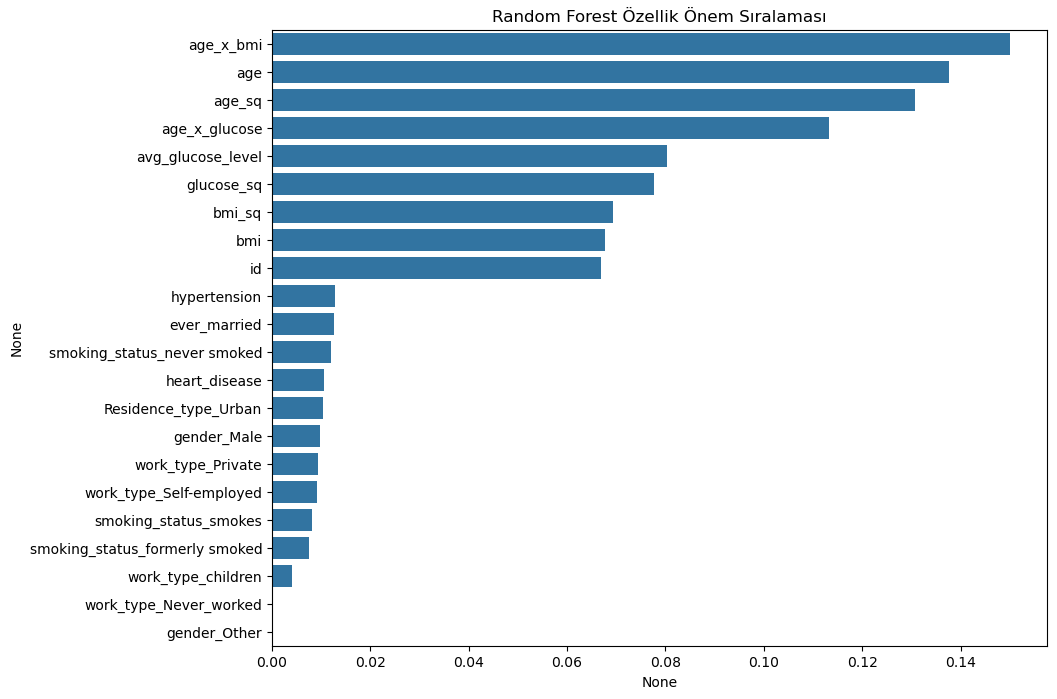

In [25]:
# Feature Selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X=df.drop(["stroke"],axis=1)
y=df["stroke"]

X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.25, random_state=15)

model_rf =RandomForestClassifier(random_state=15, class_weight="balanced")
model_rf.fit(X_train,y_train)

importances = pd.Series(model_rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=importances.index)
plt.title('Random Forest Özellik Önem Sıralaması')
plt.show()

In [27]:
# 1-LogisticRegression

from  sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC

X=df[["age_x_bmi","age","age_x_glucose","hypertension"]]
y=df["stroke"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

scaler =StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=LogisticRegression(class_weight="balanced")
model.fit(X_train_scaled,y_train)

y_pred=model.predict(X_test_scaled)


print("score:", accuracy_score(y_test,y_pred))
print("cl_rep:",classification_report(y_test,y_pred))
print("conf_matrix: \n",confusion_matrix(y_test,y_pred))
      

score: 0.7417840375586855
cl_rep:               precision    recall  f1-score   support

           0       0.99      0.74      0.84      1214
           1       0.14      0.84      0.25        64

    accuracy                           0.74      1278
   macro avg       0.57      0.79      0.55      1278
weighted avg       0.95      0.74      0.81      1278

conf_matrix: 
 [[894 320]
 [ 10  54]]


In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV,StratifiedKFold
penalty = ["l1", "l2", "elasticnet"]
c_values = [100, 10, 1, 0.1, 0.01]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga", "newton-cholesky"]
params = dict(penalty=penalty, C=c_values, solver=solver)

In [ ]:
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model, param_grid = params, cv=cv, scoring="accuracy",n_jobs=-1)

In [ ]:
grid.fit(X_train_scaled, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
y_pred = grid.predict(X_test_scaled)

print("score:", accuracy_score(y_test,y_pred))
print("cl_rep:",classification_report(y_test,y_pred))
print("conf_matrix: \n",confusion_matrix(y_test,y_pred))
      

In [34]:
# 2- SVM
X=df[["age_x_bmi","age","age_x_glucose","hypertension"]]
y=df["stroke"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

scaler =StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

svc=SVC(class_weight="balanced")
svc.fit(X_train_scaled,y_train)

y_pred=svc.predict(X_test_scaled)


print("score:", accuracy_score(y_test,y_pred))
print("cl_rep:",classification_report(y_test,y_pred))
print("conf_matrix: \n",confusion_matrix(y_test,y_pred))


score: 0.7316118935837246
cl_rep:               precision    recall  f1-score   support

           0       0.99      0.73      0.84      1214
           1       0.14      0.84      0.24        64

    accuracy                           0.73      1278
   macro avg       0.56      0.78      0.54      1278
weighted avg       0.95      0.73      0.81      1278

conf_matrix: 
 [[881 333]
 [ 10  54]]


In [39]:
#GridSerachCV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid=GridSearchCV(SVC(class_weight="balanced"),param_grid=param_grid,refit=True,cv=5)
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [40]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [41]:
y_pred2=grid.predict(X_test_scaled)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1214
           1       0.09      0.41      0.15        64

    accuracy                           0.77      1278
   macro avg       0.53      0.60      0.51      1278
weighted avg       0.92      0.77      0.83      1278

[[955 259]
 [ 38  26]]


In [43]:
# 3-NaiveBayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb.fit(X_train_scaled, y_train)
y_pred3 = gnb.predict(X_test_scaled)

In [45]:
print("confusion matrix: \n", confusion_matrix(y_pred3, y_test))
print("accuracy score: ", accuracy_score(y_pred3, y_test))
print("classification report: ", classification_report(y_pred3, y_test))

confusion matrix: 
 [[1091   39]
 [ 123   25]]
accuracy score:  0.8732394366197183
classification report:                precision    recall  f1-score   support

           0       0.90      0.97      0.93      1130
           1       0.39      0.17      0.24       148

    accuracy                           0.87      1278
   macro avg       0.64      0.57      0.58      1278
weighted avg       0.84      0.87      0.85      1278



In [53]:
# 4-KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree')
knn.fit(X_train_scaled,y_train)
y_pred4=knn.predict(X_test_scaled)

In [54]:
print("confusion matrix: \n", confusion_matrix(y_pred4, y_test))
print("accuracy score: ", accuracy_score(y_pred4, y_test))
print("classification report: ", classification_report(y_pred4, y_test))

confusion matrix: 
 [[1199   62]
 [  15    2]]
accuracy score:  0.9397496087636933
classification report:                precision    recall  f1-score   support

           0       0.99      0.95      0.97      1261
           1       0.03      0.12      0.05        17

    accuracy                           0.94      1278
   macro avg       0.51      0.53      0.51      1278
weighted avg       0.97      0.94      0.96      1278



In [55]:
# 5-DecisionTree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

tree_model.fit(X_train_scaled, y_train)
y_pred5 = tree_model.predict(X_test_scaled)

In [56]:
print("confusion matrix: \n", confusion_matrix(y_pred5, y_test))
print("accuracy score: ", accuracy_score(y_pred5, y_test))
print("classification report: ", classification_report(y_pred5, y_test))

confusion matrix: 
 [[1213   64]
 [   1    0]]
accuracy score:  0.9491392801251957
classification report:                precision    recall  f1-score   support

           0       1.00      0.95      0.97      1277
           1       0.00      0.00      0.00         1

    accuracy                           0.95      1278
   macro avg       0.50      0.47      0.49      1278
weighted avg       1.00      0.95      0.97      1278



In [58]:
#GridSearchCV
param = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4,5,15,None],
    "max_features" : ["sqrt", "log2", None]
}
grid=GridSearchCV(estimator = DecisionTreeClassifier(class_weight="balanced"), param_grid=param, cv=5,scoring="accuracy")
grid.fit(X_train_scaled,y_train)
y_pred6 = grid.predict(X_test_scaled)

print("confusion matrix: \n", confusion_matrix(y_pred6, y_test))
print("accuracy score: ", accuracy_score(y_pred6, y_test))
print("classification report: ", classification_report(y_pred6, y_test))

confusion matrix: 
 [[1166   58]
 [  48    6]]
accuracy score:  0.917057902973396
classification report:                precision    recall  f1-score   support

           0       0.96      0.95      0.96      1224
           1       0.09      0.11      0.10        54

    accuracy                           0.92      1278
   macro avg       0.53      0.53      0.53      1278
weighted avg       0.92      0.92      0.92      1278

